## Plotting Spotter Spectra
This notebook demonstrates plotting the wave spectra information provided by Spotters. This includes variables that are a function of wave frequency - specifically, the variance density (e(f)) and the first four fourier coefficients of the directional distribution. See [insert citation] for more details on the observations obtained from directional wave buoys (and their differences from spectral wave model 2D spectra).

In [1]:
# Import necessary packages

import pandas as pd
import plotly.graph_objects as go
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200


## Load netcdf dataset
xarray is used to load dataset, and convert to a pandas dataframe

In [2]:
# open the file using xarray
filename = "spotter_data_spectra.nc"
wave_spectra_data  = xr.load_dataset(filename)

# print dataset info to see variables and the dimensions (only dimension is the observation index number)
wave_spectra_data


<xarray.Dataset>
Dimensions:           (frequency: 50, index: 25285)
Coordinates:
  * frequency         (frequency) float64 0.0293 0.0293 0.03906 ... 0.4883 0.498
  * index             (index) int64 0 1 2 3 4 ... 25280 25281 25282 25283 25284
Data variables:
    a1                (index, frequency) float64 nan -0.1124 ... 0.0 0.0
    a2                (index, frequency) float64 nan -0.00782 ... 0.0 0.0
    b1                (index, frequency) float64 nan 0.05474 0.1652 ... 0.0 0.0
    b2                (index, frequency) float64 nan 0.1945 0.305 ... 0.0 0.0
    latitude          (index) float64 31.5 31.49 31.47 ... 15.09 15.15 15.2
    longitude         (index) float64 147.5 147.5 147.5 ... -172.5 -172.4 -172.3
    variance_density  (index, frequency) float64 nan 0.002501 ... 0.0004405
    time              (index) datetime64[ns] 2022-06-01T00:54:01 ... 2022-06-02T23:51:25
    spotter_id        (index) object 'SPOT-0164' 'SPOT-0164' ... 'SPOT-010456'
Attributes:
    creation_date:  2023-06-15 09:21:36.495651
    author:         Isabel Houghton
    email:          isabel.houghton@sofarocean.com

In [3]:
chosen_spotter_id = 'SPOT-010323'
chosen_spotter_ds = wave_spectra_data.where(wave_spectra_data["spotter_id"]==chosen_spotter_id, drop=True)


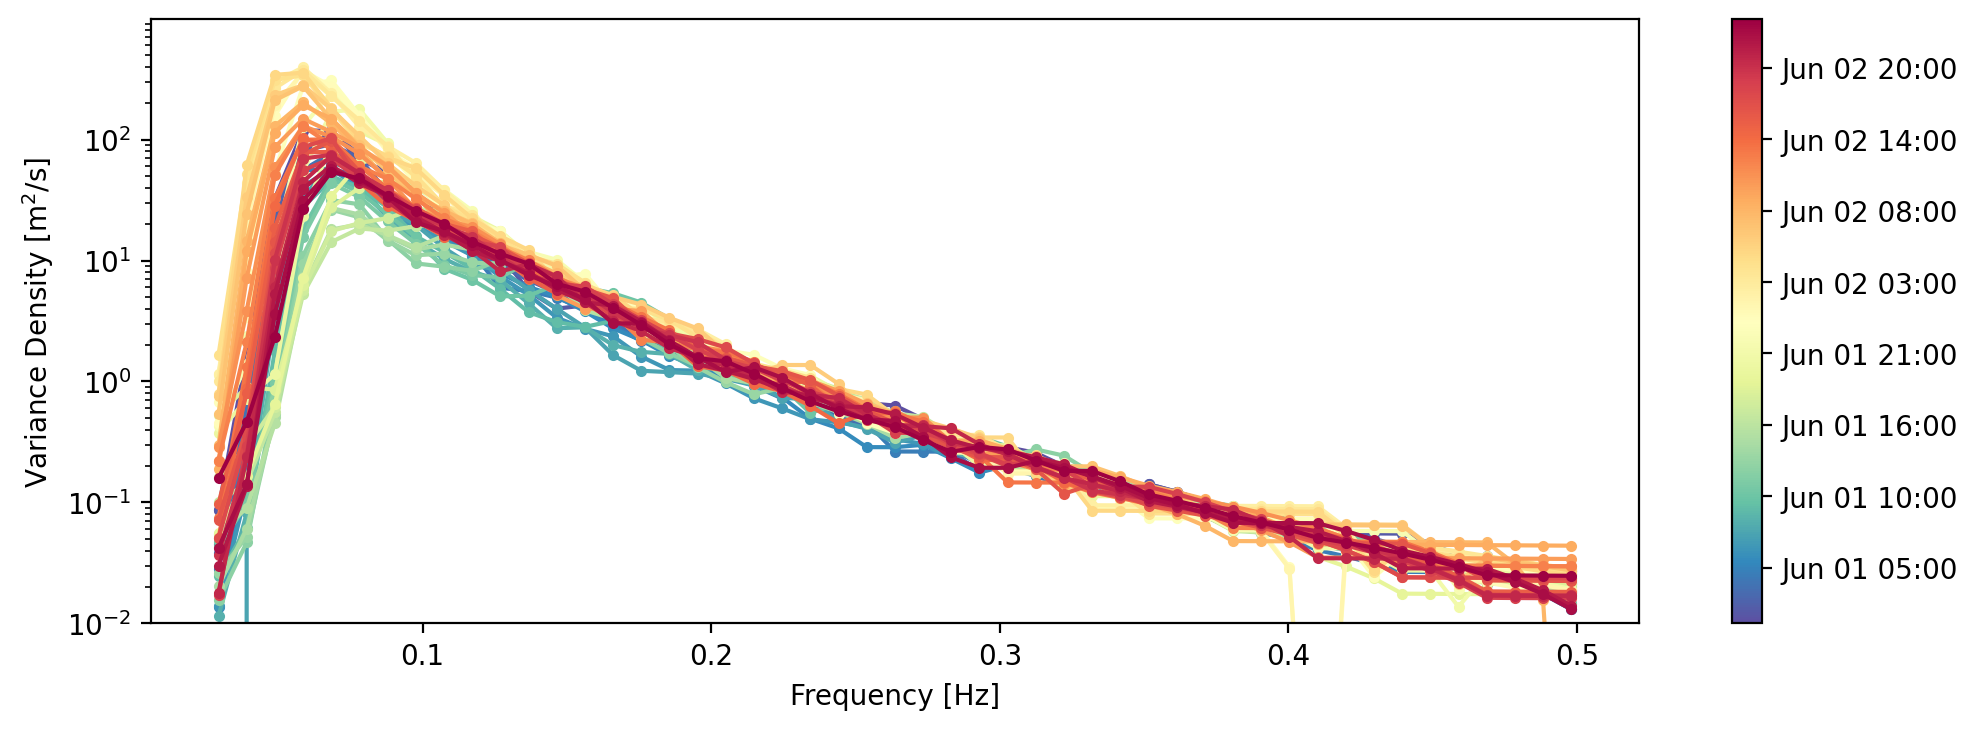

In [5]:
from matplotlib.pyplot import cm

color = cm.Spectral_r(np.linspace(0, 1, len(chosen_spotter_ds.index)))

fig, ax = plt.subplots(1,1, figsize=(12,4))
for ind, c in enumerate(color):
    ax.plot(chosen_spotter_ds.frequency.values, chosen_spotter_ds.variance_density.values[ind,:],
              marker='.', label=chosen_spotter_ds.time[ind].values, c=c)
    
ax.set(xlabel="Frequency [Hz]", ylabel="Variance Density [m$^2$/s]")
ax.set_yscale('log')
# ax.legend()

sm = cm.ScalarMappable(cmap="Spectral_r", 
                           norm=plt.Normalize(vmin=chosen_spotter_ds.time.min(),
                                              vmax=chosen_spotter_ds.time.max()))

cbar = plt.colorbar(sm);
# Change the numeric ticks into ones that match the x-axis
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %d %H:00')) #date_format='%b %Y'

ax.set_ylim(1e-2,)

plt.show()